In [6]:
# imports.py
from imports import *
# custom mods
import tidy

In [20]:
import nltk
import pandas as pd
import numpy as np
from env import *

import tweepy as tw 
import scipy.stats as stats

In [19]:
df=tidy.explore_df()

cached csv


In [16]:
df.index.min()

Timestamp('2014-09-17 00:00:00+0000', tz='UTC')

In [17]:
df.index.max()

Timestamp('2022-05-24 00:00:00+0000', tz='UTC')

<AxesSubplot:>

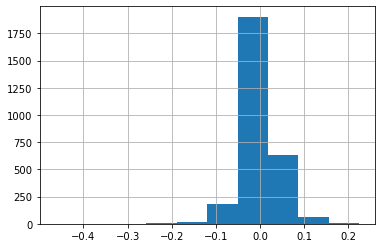

In [32]:
df.fwd_log_ret.hist()

<AxesSubplot:>

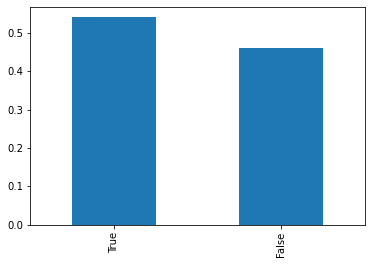

In [33]:
df.fwd_close_positive.value_counts(normalize=True).plot.bar()

### When volatility is high what kind of returns are expected? 
- Measure this using ATR:
    - TR = Max[(H-L), Abs(H-Cp), Abs(L-Cp)]
    - ATR = (1/n)* sum(TRi)

In [111]:
from talib import ATR

In [154]:
def add_ATR_feature(df):
    """Adds columns with boolean of whether current and historical ATR 
    is greater than the ATR threshold (percentage)"""
    
    df_calc = df.copy()

    # Calculate the 14 day ATR and add it as column to df
    df_calc['ATR_14'] = ATR(df_calc.high, df_calc.low, df_calc.close, 14)
    # Calculate the rolling 14 day average of ATR and add it as column to df
    df_calc['avg_atr_14'] = df_calc.ATR_14.rolling(14).mean()
    # Calculate the percentage current 14 day ATR is above/below the rolling mean
    df_calc['atr_vs_historical'] = (df_calc.ATR_14 - df_calc.avg_atr_14)/df_calc.avg_atr_14
    
    thresholds_to_add = [0.01, 0.05, 0.1, 0.2, 0.3]
    
    for threshold in thresholds_to_add:
        df[f'atr_above_threshold_{threshold}'] = df_calc.atr_vs_historical>threshold
    
    return df

In [156]:
add_ATR_feature(df)

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,ATR_14,avg_atr_14,atr_vs_historical,atr_above_threshold,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3
date,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,NaN,NaN,False,False,False,False,False,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,NaN,NaN,NaN,False,False,False,False,False,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,NaN,NaN,NaN,False,False,False,False,False,False
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,NaN,NaN,NaN,False,False,False,False,False,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,NaN,NaN,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20 00:00:00+00:00,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,1934.784373,1908.213044,0.013925,False,True,False,False,False,False
2022-05-21 00:00:00+00:00,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,1836.690818,1926.856448,-0.046794,False,False,False,False,False,False
2022-05-22 00:00:00+00:00,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,1787.689884,1941.753391,-0.079342,False,False,False,False,False,False


In [120]:
def perform_ATR_analysis(df, atr_threshold  = 0.05, make_plots = True, alpha = 0.05):
    """Performs analysis of returns based on current vs historical ATR.
    
    If the difference in current and historical ATR is greater than the ATR threshold (percentage)"""

    # Calculate the 14 day ATR and add it as column to df
    df['ATR_14'] = ATR(df.high, df.low, df.close, 14)
    # Calculate the rolling 14 day average of ATR and add it as column to df
    df['avg_atr_14'] = df.ATR_14.rolling(14).mean()
    # Calculate the percentage current 14 day ATR is above/below the rolling mean
    df['atr_vs_historical'] = (df.ATR_14 - df.avg_atr_14)/df.avg_atr_14

    if make_plots:
    # Plot ATR 14 and close price
        fig, ax = plt.subplots(2,1,sharex=True)
        df.close.plot(ax = ax[0])
        ax[0].set_title('Close price of BTC')
        df.avg_atr_14.plot(ax = ax[1])
        ax[1].set_title('Rolling 14 day average of 14 day ATR')

    df['atr_above_threshold'] = df.atr_vs_historical>atr_threshold

    print(f"Percentage of observations above threshold: {df.atr_above_threshold.mean():.2%}")
    
    avg_return_above_threshold = round(df[df.atr_above_threshold].fwd_log_ret.mean(),6)
    
    print(f"Average next day return when ATR above threshold: {avg_return_above_threshold}")
    
    print(f"which is: {round(df[df.atr_above_threshold].fwd_log_ret.mean()/df.fwd_log_ret.mean(),3)} times overall average")
    
    # Perform one sample t-test -> is the average return of the high volatility days significantly greater than overall mean?
    
    t,p = stats.ttest_1samp(df[df.atr_above_threshold].fwd_log_ret, df.fwd_log_ret.mean())
    
    if ((t>0)&(p/2<alpha)):
        print("Results significant!: t is >0",t>0,"p/2 < alpha",p<alpha)
    else:
        print("Fail to reject null hypothesis")
        
    return avg_return_above_threshold
    

In [131]:
thresholds_to_try = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
returns = {}
for threshold in thresholds_to_try:
    avg_return = perform_ATR_analysis(df, atr_threshold=threshold, make_plots=False)
    returns[threshold] = avg_return


Percentage of observations above threshold: 38.69%
Average next day return when ATR above threshold: 0.002414
which is: 1.624 times overall average
Fail to reject null hypothesis
Percentage of observations above threshold: 30.00%
Average next day return when ATR above threshold: 0.004002
which is: 2.692 times overall average
Fail to reject null hypothesis
Percentage of observations above threshold: 22.19%
Average next day return when ATR above threshold: 0.00423
which is: 2.845 times overall average
Fail to reject null hypothesis
Percentage of observations above threshold: 12.36%
Average next day return when ATR above threshold: 0.00517
which is: 3.477 times overall average
Fail to reject null hypothesis
Percentage of observations above threshold: 7.59%
Average next day return when ATR above threshold: 0.00443
which is: 2.98 times overall average
Fail to reject null hypothesis
Percentage of observations above threshold: 4.99%
Average next day return when ATR above threshold: -0.002062


Text(5, 0.0017, 'Overall Mean')

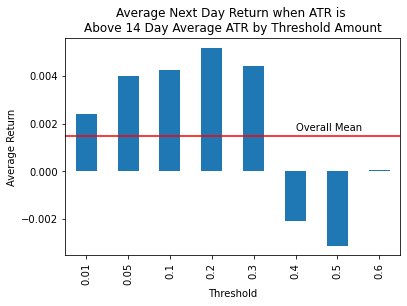

In [153]:
pd.DataFrame(returns, index = ['avg_return']).T.plot.bar(legend=False)
plt.title('Average Next Day Return when ATR is \nAbove 14 Day Average ATR by Threshold Amount')
plt.xlabel('Threshold')
plt.ylabel('Average Return')
plt.axhline(df.fwd_log_ret.mean(), color = 'r')
plt.annotate('Overall Mean', (5, 0.0017))


<AxesSubplot:xlabel='date'>

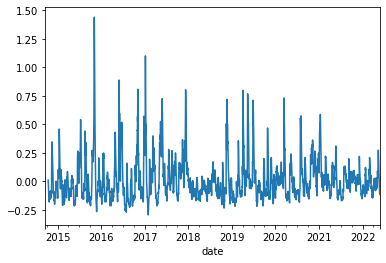

In [53]:
df.atr_vs_historical.plot()

When current ATR gets very extended from mean, what are next day returns?
- very extended defined as difference in current ATR from 14 day historical ATR as greater than the 3rd quartile

In [60]:
atr_threshold = df.atr_vs_historical.quantile(0.75)

df['atr_above_threshold'] = df.atr_vs_historical>atr_threshold

df.atr_above_threshold.mean()

As expected, the difference in current volatility from 14 day average is above threshold 25% of the time

What is the average return when (Current ATR - Historical ATR) > threshold? How does this compare with overall average?

In [62]:
df[df.atr_above_threshold].fwd_log_ret.mean()

0.004058148250319954

How does this compare to overall average?

In [65]:
df[df.atr_above_threshold].fwd_log_ret.mean()/df.fwd_log_ret.mean()

2.7296384679490866

Nearly 3 times as high as average. Check for statistical significance at the 95% confidence level:
- H0: Days with volatility above the threshold do not exhibit above average returns
- H1: Days with volatility above the threshold return in above average next day returns

In [69]:
alpha = 0.05
t,p = stats.ttest_1samp(df[df.atr_above_threshold].fwd_log_ret, df.fwd_log_ret.mean())

print("t is >0",t>0,"p/2 < alpha",p<alpha)

Cannot reject the null hypothesis - days with above average volatility do not result in above average next day returns. Will try additional thresholds

### Bollinger bands - when price is "stretched" a certain point from its average do we expect returns to be greater?

In [18]:
from talib import BBANDS

In [57]:
# Create 5 period sma as middle band, 2 std dev +- for upper and lower bands
df['upperband2'], df['middleband'], df['lowerband2'] = BBANDS(df.close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

df['upperband1'], df['middleband'], df['lowerband1'] = BBANDS(df.close, timeperiod=5, nbdevup=1, nbdevdn=1, matype=0)



# create columns true when low below lower band, another column true when high above upper band
df['low_below_lower1'] = df.low < df.lowerband1
df['high_above_upper1'] = df.high > df.upperband1

df['low_below_lower2'] = df.low < df.lowerband2
df['high_above_upper2'] = df.high > df.upperband2

In [59]:
df.low_below_lower1.mean()

0.46597791236195224

In [60]:
df.high_above_upper1.mean()

0.5553972212326327

What is the average forward return when low below lower and what is it when high above upper?

In [61]:
df[df.low_below_lower2].fwd_log_ret.mean()

5.468772458423057e-05

In [62]:
df[df.high_above_upper2].fwd_log_ret.mean()

0.00025614540533167523

In [63]:
df[df.low_below_lower1].fwd_log_ret.mean()

-0.0002509609606985909

In [64]:
df[df.high_above_upper1].fwd_log_ret.mean()

0.002590890403563458

In [30]:
df.fwd_log_ret.mean()

0.0014866980730122267

Overall the returns are much less than average when price is stretched 2 std dev away from the mean

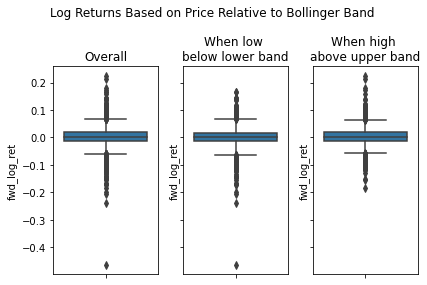

In [65]:
fig, ax = plt.subplots(1,3,sharey=True)
sns.boxplot(y=df.fwd_log_ret, ax = ax[0])
ax[0].set_title('Overall')
sns.boxplot(y=df[df.low_below_lower1].fwd_log_ret, ax=ax[1])
ax[1].set_title('When low \nbelow lower band')
sns.boxplot(y=df[df.high_above_upper1].fwd_log_ret, ax = ax[2])
ax[2].set_title('When high \nabove upper band')
plt.suptitle('Log Returns Based on Price Relative to Bollinger Band')
plt.tight_layout()

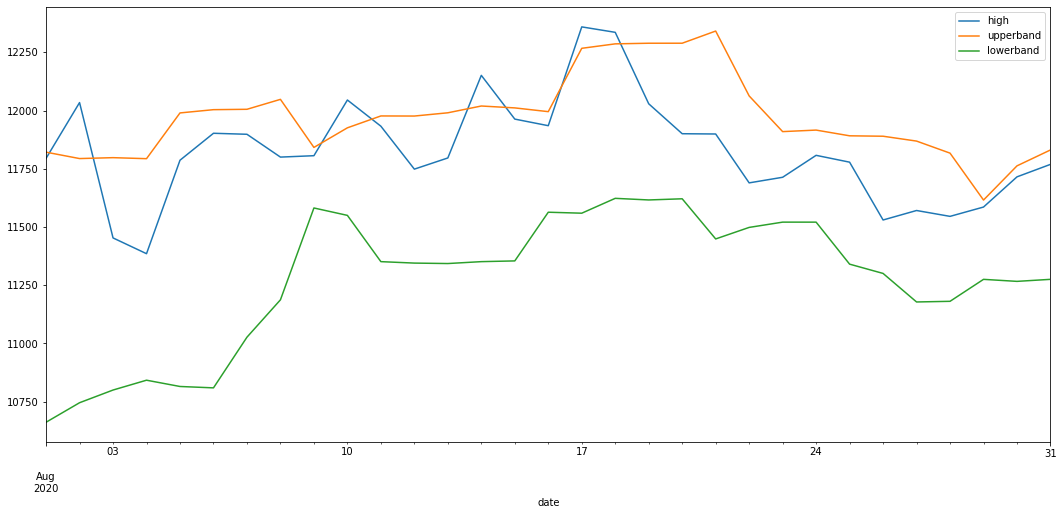

In [56]:
plt.figure(figsize = (18,8))
sample = df.loc['08-2020']
sample.high.plot()
sample.upperband.plot()
sample.lowerband.plot()
plt.legend()

Perform t-test

In [71]:
to_test = ['low_below_lower2', 'low_below_lower1', 'high_above_upper1', 'high_above_upper2']
overall_mean = df.fwd_log_ret.mean()
alpha = 0.05
for test in to_test:
    sample = df[df[test]].fwd_log_ret
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(test, t, p/2<alpha)

low_below_lower2 -0.7212809213135888 False
low_below_lower1 -1.5194888178095236 False
high_above_upper1 1.201382924201341 False
high_above_upper2 -0.6961508741026569 False


Nothing significant

### Explore consolidation then breakout of price

Quick nlp 

In [23]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

import numpy as np

import pandas as pd
from datetime import datetime

In [10]:
(datetime.now()-datetime.now()).seconds

86399

In [24]:
def get_later_tweets(tweet_csv = 'csv/latest_tweets.csv'):
    
    start_read_time = datetime.now()
    
    print("starting reading csv at: ", start_read_time)
    
    # https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
    latest_tweets = pd.read_csv(tweet_csv)
    
    print("done reading csv, took ", ((datetime.now() - start_read_time).seconds)/60, " minutes")
    
    # some values don't have proper date values
    latest_tweets= latest_tweets[latest_tweets.date.str.len()==19]

    # Set index to date
    latest_tweets.index = pd.to_datetime(latest_tweets.date)

    # create date column
    latest_tweets['date_of_tweet'] = latest_tweets.index.date

    # sort index and just use date and text going forward
    latest_tweets = latest_tweets.sort_index()[['date','text']]
    
    prices_df = tidy.explore_df()
    # Join with prices df to get Bitcoin price change for that date
    latest_tweets = latest_tweets.merge(prices_df, how='left',left_on=latest_tweets.index.date, right_on = prices_df.index.date)

    latest_tweets.index = pd.to_datetime(latest_tweets.key_0)

    latest_tweets = latest_tweets[['fwd_log_ret','text']]

    latest_tweets.index.name = ""
    
    return latest_tweets

In [25]:
latest_tweets = get_later_tweets()

starting reading csv at:  2022-06-02 09:30:15.855555


/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_13067/1495300577.py:8: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  latest_tweets = pd.read_csv(tweet_csv)


done reading csv, took  0.43333333333333335  minutes


/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_13067/1495300577.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_tweets['date_of_tweet'] = latest_tweets.index.date


cached csv


In [ ]:
def read_and_clean_early_tweets(time_columns = 'timestamp', csv_location = 'csv/early_tweets.csv'):
    """ Reads in early tweets (until 2019), clean up the dates, and outputs dataframe with date and text of tweet """
    
    # Define required columns from the csv - this should speed up load
    req_cols = ['timestamp','likes','retweets','text']
    
    # Read CSV
    tweets = pd.read_csv(csv_location,nrows = 16000000,on_bad_lines='skip',sep=';', usecols = req_cols)
    
    print("Completed reading in csv, shape: ", tweets.shape)
    
    # Clean dates (sometimes the time column has non time values. If it's a timestamp should have set number of characters
    if time_column == 'time': # For reading in later tweets, that csv's time column is called 'time'
        tweets = tweets[tweets[time_column].str.len()==25]
    
    # convert time to datetime
    tweets[time_column]= pd.to_datetime(tweets[time_column])
    
    # Create date column
    tweets['date'] = tweets[time_column].dt.date
    
    # Only use date and text columns
    tweets = tweets[['date','text']]
    
    return tweets

In [160]:
req_cols = ['timestamp','likes','retweets','text']
tweets = pd.read_csv('csv/early_tweets.csv',nrows = 16000000,on_bad_lines='skip',sep=';', usecols = req_cols)

/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_7175/84593635.py:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('csv/early_tweets.csv',nrows = 16000000,on_bad_lines='skip',sep=';', usecols = req_cols)


In [161]:
tweets.shape

(16000000, 4)

In [162]:
tweets.head()

,timestamp,likes,retweets,text
0,2019-05-27 11:49:14+00,0.0,0.0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,0.0,0.0,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,2.0,1.0,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,0.0,0.0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [163]:
def initial_tweet_clean(tweets,time_column = 'time'):
    # Clean dates
    if time_column == 'time':
        tweets = tweets[tweets[time_column].str.len()==25]

    tweets[time_column]= pd.to_datetime(tweets[time_column])

    tweets['date'] = tweets[time_column].dt.date

    tweets = tweets[['date','text']]
    
    return tweets


In [ ]:
cleaned_early_tweets = read_and_clean_early_tweets()

In [164]:
# cleaned_tweets = initial_tweet_clean(tweets, 'timestamp')

In [166]:
cleaned_tweets['sentiment'] = cleaned_tweets.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])

AttributeError: 'float' object has no attribute 'encode'

In [87]:
prepared_tweets = tidy.prepare_df(tweets.sample(5000), 'text')

prices = df

prepared_tweets = prepared_tweets.merge(prices, how = 'left', left_on = 'date', right_on = prices.index.date)

prepared_tweets.index = pd.to_datetime(prepared_tweets.date)

In [89]:
lem_and_ret = prepared_tweets.resample('D').agg({'lemmatized':' '.join, 'fwd_log_ret':np.mean, 'fwd_close_positive':np.mean})

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [104]:
tweets['sentiment'] = tweets.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])

/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_7175/3598481775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiment'] = tweets.text.apply(lambda msg: sia.polarity_scores(msg)['compound'])


In [108]:
tweets.date.max()

datetime.date(2019, 5, 27)

In [51]:
train = lem_and_ret.iloc[:20]

validate = lem_and_ret.iloc[20:]

In [52]:
target = 'fwd_close_positive'

In [53]:
# Instantiate the feature extraction method
feature_extraction_method = CountVectorizer(ngram_range=(1,1))

# Perform feature extraction on lemmatized text from train
X_train = feature_extraction_method.fit_transform(train.lemmatized)

# Generate dataframe of results of feature extraction
train_vectorizer_df = pd.DataFrame(X_train.todense(), columns=feature_extraction_method.get_feature_names_out())

# Set index to train index
train_vectorizer_df.index = train.index

# Add in other features (lengths of readme)
# X_train = pd.concat([train_vectorizer_df,train[['original_length','stem_length', 'lem_length', 'original_word_count',
#        'stemmed_word_count', 'lemmatized_word_count']]], axis = 1)

# Scale features in train (necessary for logistic regression)
# X_train_scaled = scaler.fit_transform(X_train)

# Perform feature extraction and add in additional features on validate
X_validate = feature_extraction_method.transform(validate.lemmatized)
validate_vectorizer_df = pd.DataFrame(X_validate.todense(), columns=feature_extraction_method.get_feature_names_out())
validate_vectorizer_df.index = validate.index

# X_validate = pd.concat([validate_vectorizer_df,validate[['original_length','stem_length', 'lem_length', 'original_word_count',
#        'stemmed_word_count', 'lemmatized_word_count']]], axis = 1)

# Scale validate
# X_validate_scaled = scaler.transform(X_validate)

# Define target 
y_train = train[target]
y_validate = validate[target]

In [57]:
# Create dataframe of results from train and validate
train_results=pd.DataFrame(dict(actual = y_train))
validate_results = pd.DataFrame(dict(actual = y_validate))

class_model = LogisticRegression()
# Fit model to scaled train data 
model_to_use = class_model.fit(X_train, y_train)

# Predict on train and validate
train_results['predicted'] = model_to_use.predict(X_train)
validate_results['predicted'] = model_to_use.predict(X_validate)


/opt/homebrew/anaconda3/envs/quant/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Generate classification reports for train and validate
train_class_report = classification_report(train_results.actual, train_results.predicted, output_dict = True)
validate_class_report = classification_report(validate_results.actual, validate_results.predicted,output_dict=True)

In [59]:

print('Accuracy: {:.2%}'.format(accuracy_score(train_results.actual, train_results.predicted)))
print('---')
# print('Train Confusion Matrix')
# print(pd.crosstab(train_results_tfidf.predicted, train_results_tfidf.actual))
print('---')
print(pd.DataFrame(train_class_report))


print('Accuracy: {:.2%}'.format(accuracy_score(validate_results.actual, validate_results.predicted)))
print('---')
# print('Validate Confusion Matrix')
# print(pd.crosstab(validate_results_tfidf.predicted, validate_results_tfidf.actual))
print('---')
print(pd.DataFrame(validate_class_report))

Accuracy: 100.00%
---
---
            0.0  1.0  accuracy  macro avg  weighted avg
precision   1.0  1.0       1.0        1.0           1.0
recall      1.0  1.0       1.0        1.0           1.0
f1-score    1.0  1.0       1.0        1.0           1.0
support    11.0  9.0       1.0       20.0          20.0
Accuracy: 40.00%
---
---
           0.0   1.0  accuracy  macro avg  weighted avg
precision  0.5  0.25       0.4      0.375           0.4
recall     0.5  0.25       0.4      0.375           0.4
f1-score   0.5  0.25       0.4      0.375           0.4
support    6.0  4.00       0.4     10.000          10.0


In [13]:
from sklearn.model_selection import TimeSeriesSplit

In [14]:
df=tidy.explore_df()

cached csv


In [15]:
df = tidy.add_ATR_feature(df)

In [16]:
X = df[['close','atr_above_threshold_0.01',
       'atr_above_threshold_0.05', 'atr_above_threshold_0.1',
       'atr_above_threshold_0.2', 'atr_above_threshold_0.3']]
y = df[['fwd_log_ret']]

In [17]:
test_size = 50
tscv = TimeSeriesSplit(n_splits=5, test_size = test_size)
multiplier = 0
train_closes = []
test_closes = []
for train_index, test_index in tscv.split(X):
    # Sets up the rolling part of the split by moving the start index of forward by test_size for each split s
    # First split starts at 0, second starts at index = test_size, s split starts at 0+(s-1)*(test_size)
    train_index = train_index[multiplier * test_size:]
    
    print("Train:", df.index[train_index], "Test:", df.index[test_index])
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Increments multiplier for next split
    multiplier += 1
    
    train_closes.append(X_train[['close']])
    test_closes.append(X_test[['close']])
    
    

Train: DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2021-09-07 00:00:00+00:00', '2021-09-08 00:00:00+00:00',
               '2021-09-09 00:00:00+00:00', '2021-09-10 00:00:00+00:00',
               '2021-09-11 00:00:00+00:00', '2021-09-12 00:00:00+00:00',
               '2021-09-13 00:00:00+00:00', '2021-09-14 00:00:00+00:00',
               '2021-09-15 00:00:00+00:00', '2021-09-16 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=2557, freq=None) Test: DatetimeIndex(['2021-09-17 00:00:00+00:00', '2021-09-18 00:00:00+00:00',
               '2021-09-19 00:00:00+00:00', '2021-09-20 00:00:00+00:00',
           